# Unit 5 - Financial Planning


In [2]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

ModuleNotFoundError: No module named 'alpaca_trade_api'

In [5]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [6]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [7]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

btc_url = btc_url + "?format=json"
eth_url = eth_url + "?format=json"

In [8]:
# Fetch current BTC price
# get response of current cryptos
# format as json

current_btc_price = requests.get(btc_url)
response_btc = current_btc_price.content
btc_json = current_btc_price.json()


In [9]:
# Fetch current ETH price
# get response of current cryptos
# format as json

current_eth_price = requests.get(eth_url)
response_eth = current_eth_price.content
eth_json = current_eth_price.json()


In [10]:
#import json
import json

In [11]:
#output btc_json
print(json.dumps(btc_json, indent=4))


{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18723975,
            "total_supply": 18723975,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 36001.0,
                    "volume_24h": 33400485667,
                    "market_cap": 674078387512,
                    "percentage_change_1h": -0.705919877944783,
                    "percentage_change_24h": -2.04159675423827,
                    "percentage_change_7d": -6.83607368752581,
                    "percent_change_1h": -0.705919877944783,
                    "percent_change_24h": -2.04159675423827,
                    "percent_change_7d": -6.83607368752581
                }
            },
            "last_updated": 1622575187
        }
    },
    "metadata": {
        "timestamp": 1622575187,
        "num_c

In [12]:
#output eth_json
print(json.dumps(eth_json, indent=4))


{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 116116240,
            "total_supply": 116116240,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 2556.82,
                    "volume_24h": 39285720110,
                    "market_cap": 296888693693,
                    "percentage_change_1h": -0.669769523595911,
                    "percentage_change_24h": -1.85277744317512,
                    "percentage_change_7d": -3.15649314363455,
                    "percent_change_1h": -0.669769523595911,
                    "percent_change_24h": -1.85277744317512,
                    "percent_change_7d": -3.15649314363455
                }
            },
            "last_updated": 1622575132
        }
    },
    "metadata": {
        "timestamp": 1622575132,
        "nu

In [13]:
# Compute current value of my crpto
my_btc_value = btc_json['data']['1']['quotes']['USD']['price']
my_eth_value = eth_json['data']['1027']['quotes']['USD']['price']


In [14]:
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $36001.00
The current value of your 5.3 ETH is $2556.82


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [15]:
# Current amount of shares
my_spy = 50
my_agg = 200


In [16]:
# Set Alpaca API key and secret
api_key = os.getenv("ALPACA_API_KEY")
secret_api_key = os.getenv("ALPACA_SECRET_API_KEY")
# Create the Alpaca API object
alpaca = tradeapi.REST(
    api_key,
    secret_api_key,
)



In [17]:
# Format current date as ISO format
today = pd.Timestamp("2021-05-25", tz = "America/Chicago").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
index_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df
# Preview DataFrame
index_portfolio

AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2021-05-25 00:00:00-04:00  114.58  114.75  114.56  114.74  3239766  420.33   

                                                             
                             high     low   close    volume  
time                                                         
2021-05-25 00:00:00-04:00  420.71  417.62  418.25  50976654

In [18]:
# Pick AGG and SPY close prices
agg_close_price = index_portfolio['AGG']['close'].item()
spy_close_price = index_portfolio['SPY']['close'].item()

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.74
Current SPY closing price: $418.25


In [19]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20912.50
The current value of your 200 AGG shares is $22948.00


### Savings Health Analysis

In [20]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
shares_data = {
    "Shares": [my_btc_value + my_eth_value, my_spy_value + my_agg_value]
}
#set tickers as index
tickers = ["crypto","shares"]

# Display savings DataFrame
df_savings = pd.DataFrame(shares_data, index = tickers)
df_savings


,Shares
crypto,38557.82
shares,43860.50


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='Shares'>

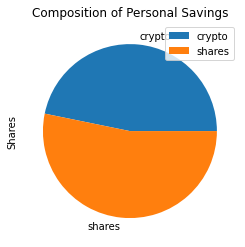

In [21]:
# Plot savings pie chart
df_savings.plot.pie(y="Shares", title = "Composition of Personal Savings" )


In [22]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings.sum().item()

# Validate saving health
if total_savings > emergency_fund:
    print("Congradulations! You have enough money in your emergency fund")
elif total_savings == emergency_fund:
    print("Congradulations! You have reached your financial goal")
else:
    print(f"You are {df_savings} - {total_savings} away from reaching your goal")


Congradulations! You have enough money in your emergency fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [23]:
#set alpaca key and secret key
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_API_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
)

In [24]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
timeframe = "1D"

start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [25]:
#set tickers for stocks
tickers = ["SPY", "AGG"]

# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

# Display sample data
df_stock_data.head()

AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2016-08-17 00:00:00-04:00  112.45  112.6600  112.3600  112.580  3136737.0   
2016-08-18 00:00:00-04:00  112.64  112.7799  112.5350  112.705  1814107.0   
2016-08-19 00:00:00-04:00  112.53  112.6200  112.3900  112.490  2961016.0   
2016-08-22 00:00:00-04:00  112.66  112.7380  112.5600  112.650  1647564.0   
2016-08-23 00:00:00-04:00  112.78  112.8250  112.6301  112.690  2197732.0   

                              SPY                                      
                             open    high     low   close      volume  
time                                                                   
2016-08-17 00:00:00-04:00     NaN     NaN     NaN     NaN         NaN  
2016-08-18 00:00:00-04:00  218.33  218.90  218.21  218.87  42850145.0  
2016-08-19 00:00:00-04:00  218.31  218.75  217.74  218.57  52238224.0  
2016-08-22 00:00:00-04:00  218.27  218.80  217.83  218.50  48628907.0  
2016-08-23 00:00:00-04:00  219.25  219.60  218.90  218.94  41981207.0

In [26]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30_year = MCSimulation(
portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [27]:
# Printing the simulation input data
MC_30_year.portfolio_data.head()


AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2016-08-17 00:00:00-04:00  112.45  112.6600  112.3600  112.580  3136737.0   
2016-08-18 00:00:00-04:00  112.64  112.7799  112.5350  112.705  1814107.0   
2016-08-19 00:00:00-04:00  112.53  112.6200  112.3900  112.490  2961016.0   
2016-08-22 00:00:00-04:00  112.66  112.7380  112.5600  112.650  1647564.0   
2016-08-23 00:00:00-04:00  112.78  112.8250  112.6301  112.690  2197732.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2016-08-17 00:00:00-04:00          NaN     NaN     NaN     NaN     NaN   
2016-08-18 00:00:00-04:00     0.001110  218.33  218.90  218.21  218.87   
2016-08-19 00:00:00-04:00    -0.001908  218.31  218.75  217.74  218.57   
2016-08-22 00:00:00-04:00     0.001422  218.27  218.80  217.83  218.50   
2016-08-23 00:00:00-04:00     0.000355  219.25  219.60  218.90  218.94   

                                                    
                               volume daily_return  
time                                                
2016-08-17 00:00:00-04:00         NaN          NaN  
2016-08-18 00:00:00-04:00  42850145.0          NaN  
2016-08-19 00:00:00-04:00  52238224.0    -0.001371  
2016-08-22 00:00:00-04:00  48628907.0    -0.000320  
2016-08-23 00:00:00-04:00  41981207.0     0.002014

In [28]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30_year.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998793,1.002124,1.007223,0.988996,1.005475,1.004469,1.004656,0.996980,0.995396,0.994792,...,0.987690,1.001374,0.993841,0.992336,1.005466,0.995802,0.998000,1.001588,1.001792,0.997916
2,1.002478,0.997609,0.995831,0.999429,1.004539,1.007635,1.000585,0.998045,0.998244,0.995914,...,0.996697,1.003836,0.999031,0.980153,0.998534,0.996326,0.991734,0.989514,0.997274,1.000178
3,1.000918,1.010153,0.988465,0.990749,1.004544,1.011993,1.011869,1.002895,1.003358,1.000889,...,1.000215,1.007815,1.001930,0.979602,1.000831,0.994225,0.996511,0.988031,0.996087,1.000615
4,0.996693,1.019279,0.988506,0.998026,1.002653,1.013210,1.016013,1.000926,1.003839,1.001171,...,1.002502,1.008520,1.002953,0.981327,1.000155,0.993368,0.994389,0.985913,0.999975,1.010438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,5.344522,5.545028,3.558978,3.076994,2.658598,8.847692,7.993646,3.826336,3.582085,4.869453,...,4.701902,7.233106,8.086306,5.585338,12.196630,8.854523,7.106345,8.017735,5.396718,12.718079
7557,5.303523,5.432091,3.605814,3.086497,2.668393,8.809908,8.091581,3.807339,3.560239,4.863302,...,4.701941,7.227539,8.055734,5.612878,12.137678,8.820521,7.194986,8.043705,5.379666,12.664182
7558,5.320868,5.439518,3.596499,3.049438,2.681771,8.824570,8.080191,3.800844,3.579538,4.841737,...,4.720684,7.228025,8.039798,5.590596,12.175240,8.816127,7.159424,8.069353,5.428482,12.703050
7559,5.290804,5.491128,3.603746,3.063007,2.686304,8.928208,8.064203,3.783923,3.601291,4.869023,...,4.731309,7.208934,8.003199,5.546565,12.215416,8.920019,7.156263,8.134798,5.433414,12.697732


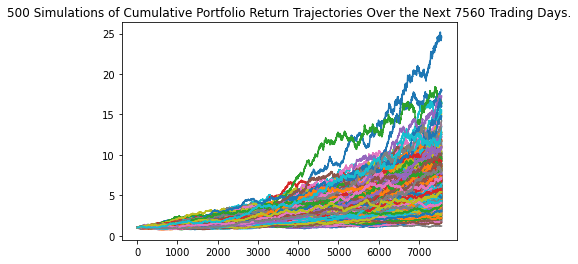

In [29]:
# Plot simulation outcomes
line_plot = MC_30_year.plot_simulation()


<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

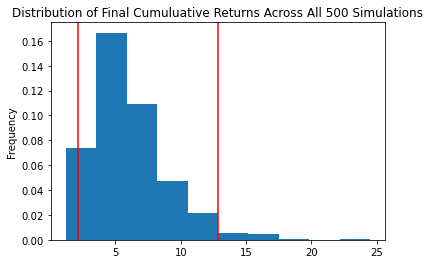

In [30]:
# Plot probability distribution and confidence intervals
MC_30_year.plot_distribution()


### Retirement Analysis

In [33]:
# Fetch summary statistics from the Monte Carlo simulation results
mc_stats = MC_30_year.summarize_cumulative_return()
# Print summary statistics
print(mc_stats)


count           500.000000
mean              6.094099
std               2.914500
min               1.196645
25%               4.035022
50%               5.511145
75%               7.396250
max              24.493969
95% CI Lower      2.160141
95% CI Upper     12.832903
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [34]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(mc_stats[8] * initial_investment,2)
ci_upper = round(mc_stats[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $43202.82 and $256658.07


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [36]:
# Set initial investment
initial_investment2 = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(mc_stats[8] * initial_investment2,2)
ci_upper = round(mc_stats[9] * initial_investment2,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $64804.23 and $384987.1


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")